# 🧭 Visualizing the Relationship Between k-NN Decision Boundaries and Voronoi Tessellations

This notebook explores how **k-Nearest Neighbors (k-NN)** decision boundaries relate to **Voronoi tessellations** in feature space.  
We use a clustering dataset from Kaggle’s *Wine Dataset for Clustering* to visualize how each data point defines its own decision region when `k=1`.

---

### 📊 Notebook Overview
1. Load and scale the wine dataset  
2. Perform clustering using **K-Means**  
3. Visualize clusters in 2D using *Flavanoids* and *Malic_Acid*  
4. Train a **k-NN classifier** and plot its decision regions  
5. Overlay **Voronoi tessellations** to demonstrate their alignment with the k=1 boundaries  
6. Zoom into regions to analyze local boundary precision

---

### 🧠 Key Concepts
- For `k=1`, k-NN regions correspond exactly to **Voronoi cells**.  
- k-NN decision boundaries are **numerical approximations**; Voronoi borders are **analytical**.  
- Increasing the mesh resolution smooths the contour approximation, matching the Voronoi diagram more closely.


/Users/pcturnes/Documents/Projects/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/pcturnes/.cache/kagglehub/datasets/harrywang/wine-dataset-for-clustering/versions/1


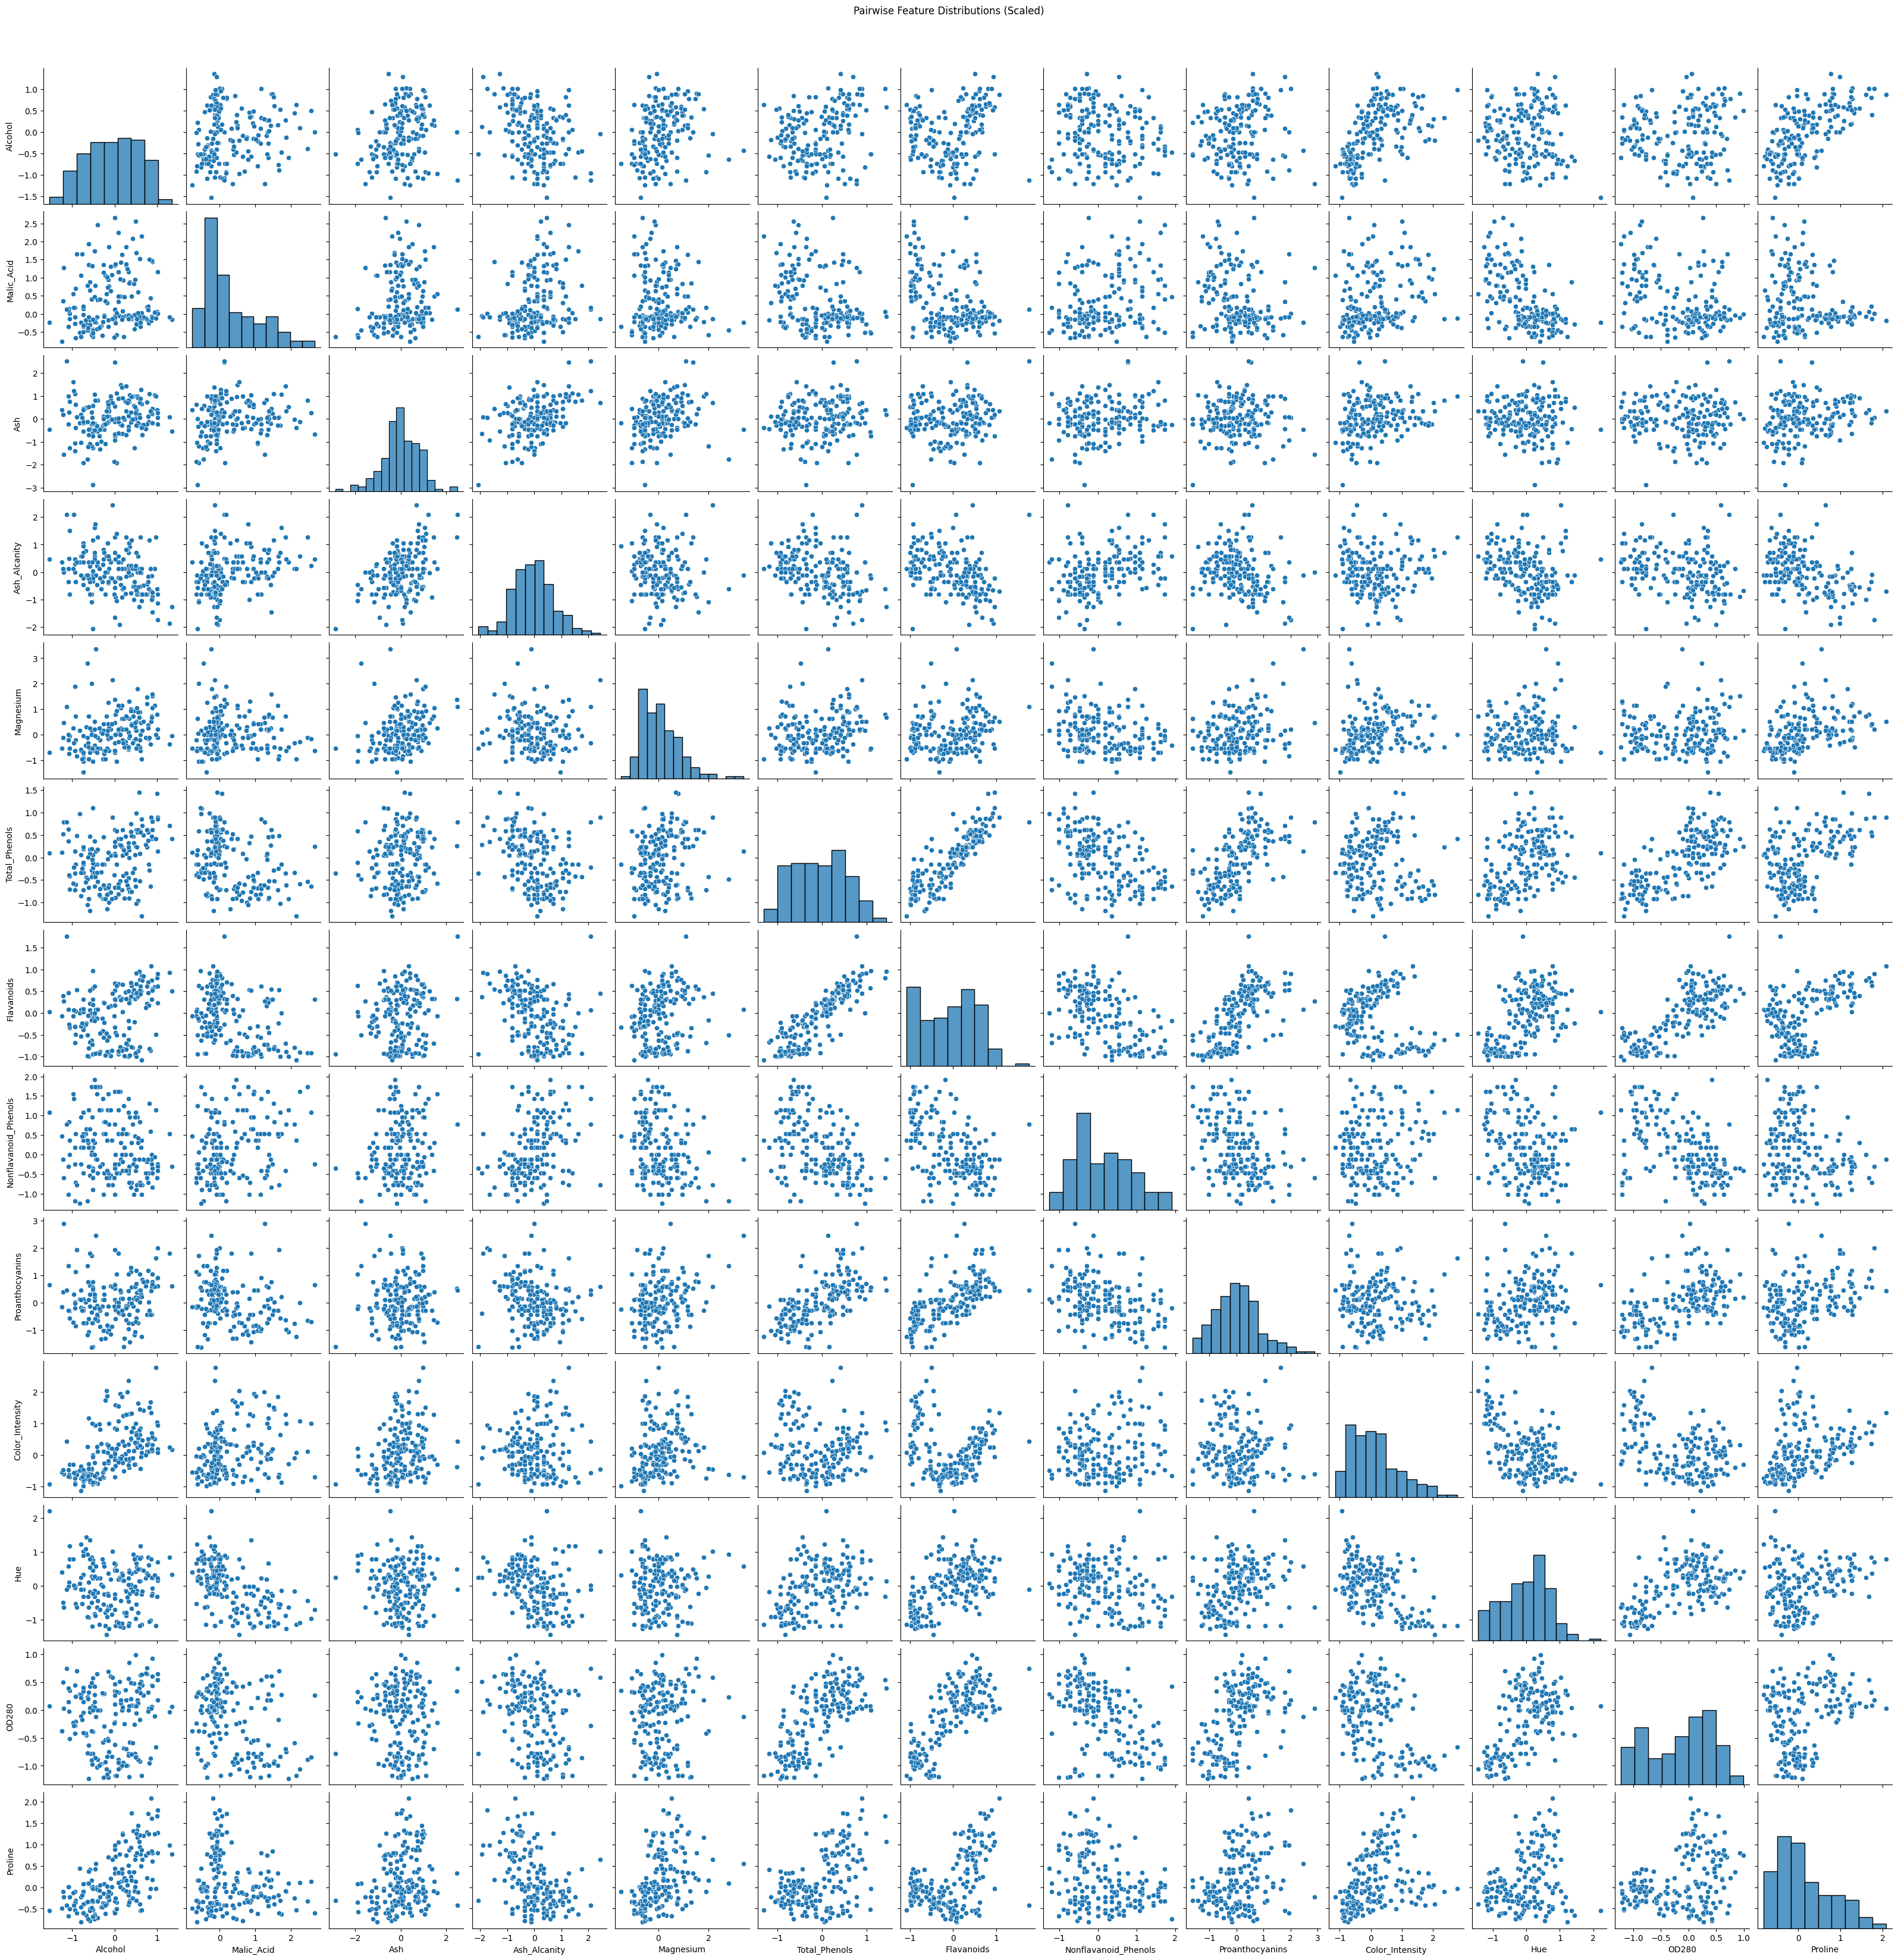

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

# Download latest version of the dataset
path = kagglehub.dataset_download("harrywang/wine-dataset-for-clustering")
print("Path to dataset files:", path)

# Load dataset
file_path = f"{path}/wine-clustering.csv"
df = pd.read_csv(file_path)

# Scale only numeric features using RobustScaler to reduce the effect of outliers
scaler = RobustScaler()
numeric_df = df.select_dtypes(include=['number'])
scaled_data = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Visual overview of feature relationships
sns.pairplot(scaled_df, diag_kind="hist")
plt.suptitle("Pairwise Feature Distributions (Scaled)", y=1.02)
plt.show()


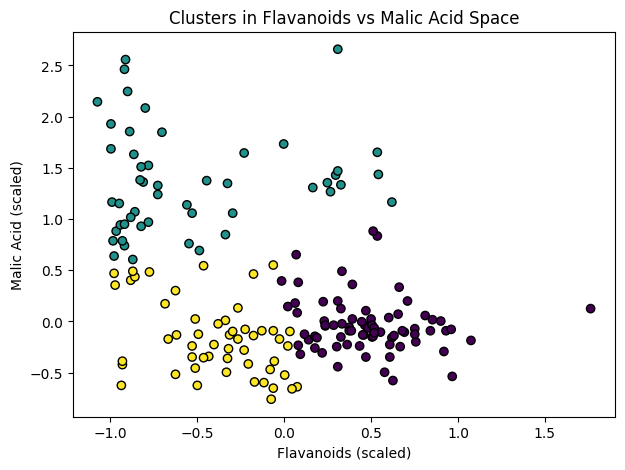

In [2]:
# Choose the two features that appear most separable visually
X = scaled_df[['Flavanoids', 'Malic_Acid']].values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X)

# Assign cluster labels
labels = kmeans.labels_
df['Class'] = labels

# Scatter plot of clusters
plt.figure(figsize=(7, 5))
plt.scatter(scaled_df['Flavanoids'], scaled_df['Malic_Acid'], c=labels, cmap='viridis', edgecolor='k')
plt.title("Clusters in Flavanoids vs Malic Acid Space")
plt.xlabel("Flavanoids (scaled)")
plt.ylabel("Malic Acid (scaled)")
plt.show()


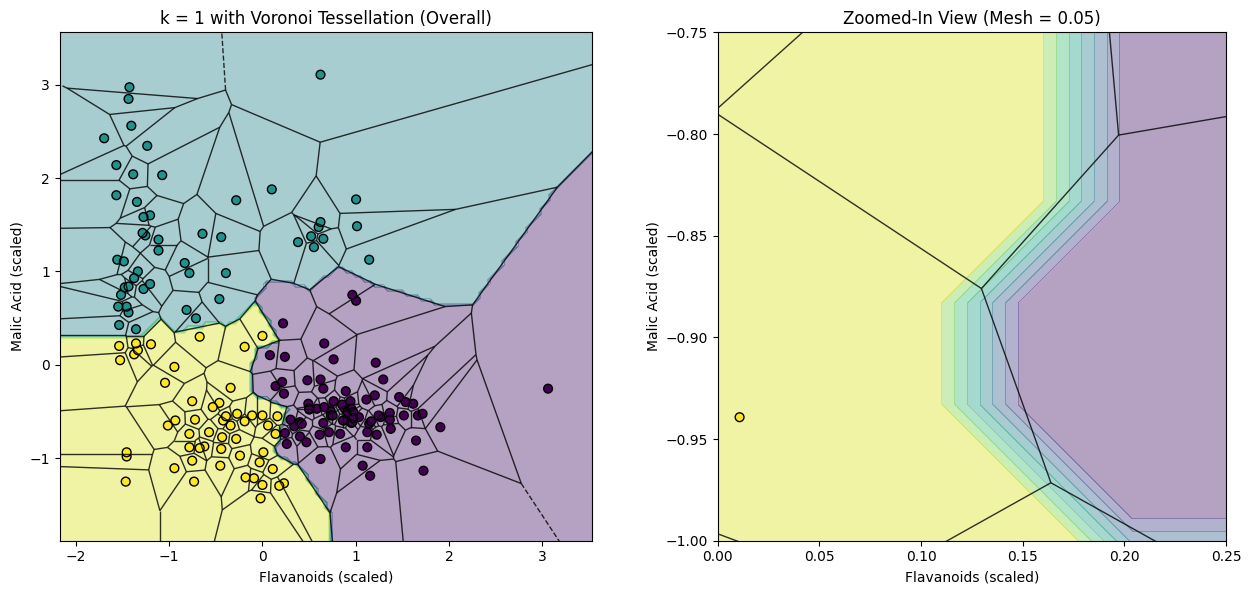

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Select features and labels
X = df[['Flavanoids', 'Malic_Acid']].values
y = df['Class'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train k-NN with k=1
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

# Create meshgrid in scaled space (standard resolution)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict for each grid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Compute Voronoi tessellation
vor = Voronoi(X_scaled)

# --- Plot side-by-side ---
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

# LEFT: Overall view
axs[0].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
voronoi_plot_2d(vor, ax=axs[0], show_vertices=False, line_colors='black',
                line_width=1.0, line_alpha=0.8, point_size=0)
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', s=40, cmap='viridis')
axs[0].set_title("k = 1 with Voronoi Tessellation (Overall)")
axs[0].set_xlabel("Flavanoids (scaled)")
axs[0].set_ylabel("Malic Acid (scaled)")
axs[0].set_aspect('equal')

# RIGHT: Zoomed-in view
axs[1].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
voronoi_plot_2d(vor, ax=axs[1], show_vertices=False, line_colors='black',
                line_width=1.0, line_alpha=0.8, point_size=0)
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', s=40, cmap='viridis')
axs[1].set_xlim(0, 0.25)
axs[1].set_ylim(-1.0, -0.75)
axs[1].set_title("Zoomed-In View (Mesh = 0.05)")
axs[1].set_xlabel("Flavanoids (scaled)")
axs[1].set_ylabel("Malic Acid (scaled)")
axs[1].set_aspect('equal')

plt.tight_layout()
plt.show()


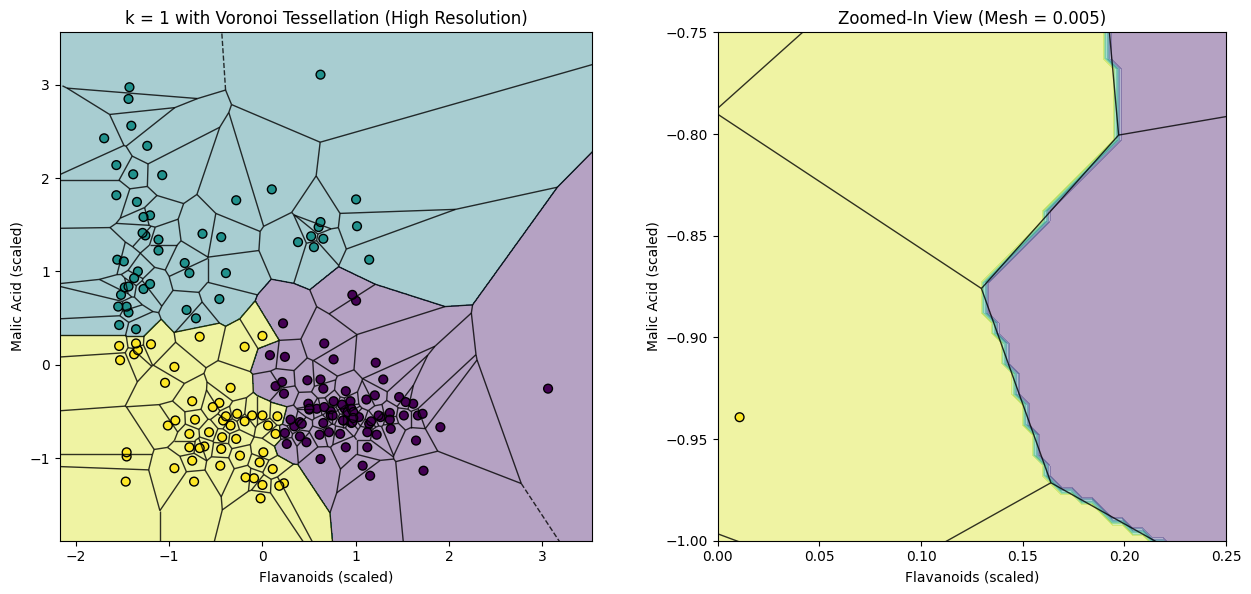

In [4]:
# Same setup, but higher-resolution meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))

# Predict again
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plot side-by-side ---
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

# LEFT: Overall view
axs[0].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
voronoi_plot_2d(vor, ax=axs[0], show_vertices=False, line_colors='black',
                line_width=1.0, line_alpha=0.8, point_size=0)
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', s=40, cmap='viridis')
axs[0].set_title("k = 1 with Voronoi Tessellation (High Resolution)")
axs[0].set_xlabel("Flavanoids (scaled)")
axs[0].set_ylabel("Malic Acid (scaled)")
axs[0].set_aspect('equal')

# RIGHT: Zoomed-in view
axs[1].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
voronoi_plot_2d(vor, ax=axs[1], show_vertices=False, line_colors='black',
                line_width=1.0, line_alpha=0.8, point_size=0)
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', s=40, cmap='viridis')
axs[1].set_xlim(0, 0.25)
axs[1].set_ylim(-1.0, -0.75)
axs[1].set_title("Zoomed-In View (Mesh = 0.005)")
axs[1].set_xlabel("Flavanoids (scaled)")
axs[1].set_ylabel("Malic Acid (scaled)")
axs[1].set_aspect('equal')

plt.tight_layout()
plt.show()


## ✅ Conclusions

- The **Voronoi tessellation** precisely defines the regions that the **k-NN classifier** with `k=1` produces.  
- Any mismatch observed at low resolution arises from the **discretization** of the mesh grid used for visualization.  
- Increasing the mesh resolution brings the numerical and analytical boundaries into perfect alignment.  
- This experiment beautifully illustrates how **geometric proximity** underlies nearest-neighbor classification.